In [1]:
# Import packages
import numpy as np
import tomopy
import cv2
import matplotlib.pyplot as plt

In [2]:
# Creating ground truth tomography
data = tomopy.shepp3d(256)
ang = tomopy.angles(181)
proj = tomopy.project(data, ang)

In [3]:
# Randomly determined misalignment axis
mis_axis = np.random.normal(0, 1, (200, 3))
mis_axis[:, :1] = mis_axis[:, :1]*4
mis_axis = np.round(mis_axis).astype(int)

In [4]:
# Define function for artificial misalignment
def misalign(prj, mis_axis, ang_tilt = False, noise = False, background = False):
    num_prj, col, row = prj.shape
    prj_tmp = np.zeros_like(prj)
    for i in range(num_prj):
        d_row, d_col, d_ang = mis_axis[i]
        if ang_tilt == True:
            prj_tmp[i, :, :] = rotate(prj[i,:,:], d_ang)
        else:
            prj_tmp[i, :, :] = prj[i,:,:]
        translation_matrix = np.float32([ [1,0,d_row], [0,1,d_col] ])
        prj_tmp[i, :, :] = cv2.warpAffine(prj_tmp[i, :, :], translation_matrix, (row, col))
        if noise == True:
            prj_tmp[i, :, :] = random_noise(prj_tmp[i, :, :], mode = 'gaussian')
        if background == True:
            prj_tmp[i, :, :] = prj_tmp[i, :, :]+np.random.random()/5
            prj_tmp[i, :, :] = prj_tmp[i, :, :]/prj_tmp[i, :, :].max()
    return prj_tmp

In [5]:
# Creating misaligned projections
proj_mis = misalign(proj, mis_axis)

In [12]:
# Creating realigned projection using joint alignment
proj_align = tomopy.align_joint(proj_mis.copy(), ang, iters = 10, algorithm = 'sirt')

iter=0, err=0.2538353878418597
iter=1, err=0.014428248752457821
iter=2, err=0.00592475441086156
iter=3, err=0.004171179312728405
iter=4, err=0.0033149171764679376
iter=5, err=0.001913868324175078
iter=6, err=0.0027066185406446628
iter=7, err=0.0018323894142414146
iter=8, err=0.001992017308945243
iter=9, err=0.0012353966910606626


In [13]:
# Testing to see if return array is equivilant to input array
print(np.array_equiv(proj_mis, proj_align[0]))

True


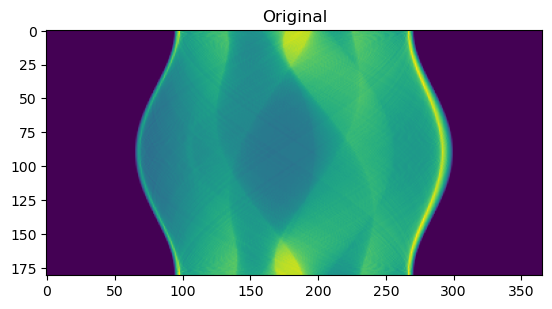

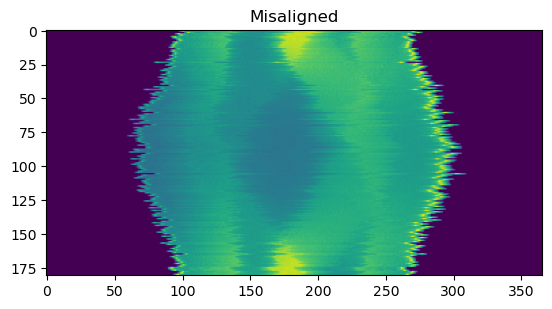

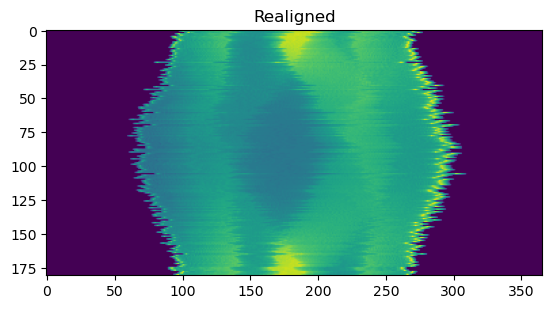

In [14]:
# Sinogram for original
plt.imshow(proj[:, 128, :])
plt.title('Original')
plt.show()

# Sinogram for misaligned
plt.imshow(proj_mis[:, 128, :])
plt.title('Misaligned')
plt.show()

# Sinogram for realigned
plt.imshow(proj_align[0][:, 128, :])
plt.title('Realigned')
plt.show()

In [15]:
# Create tomographic reconstructions
recon = tomopy.recon(proj, ang, algorithm='gridrec', sinogram_order=False)
recon_mis = tomopy.recon(proj_mis, ang, algorithm='gridrec', sinogram_order=False)
recon_align = tomopy.recon(proj_align[0], ang, algorithm='gridrec', sinogram_order=False)

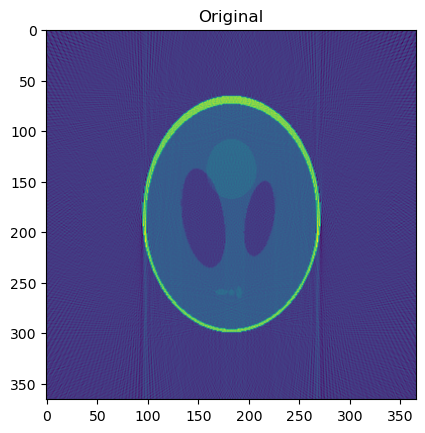

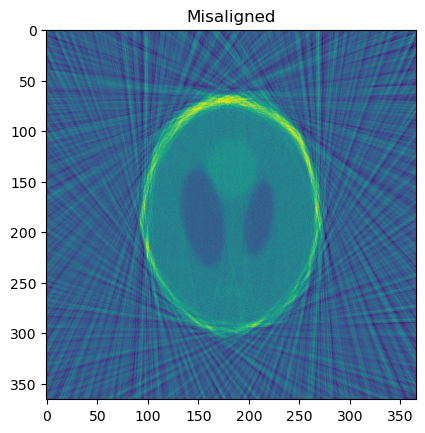

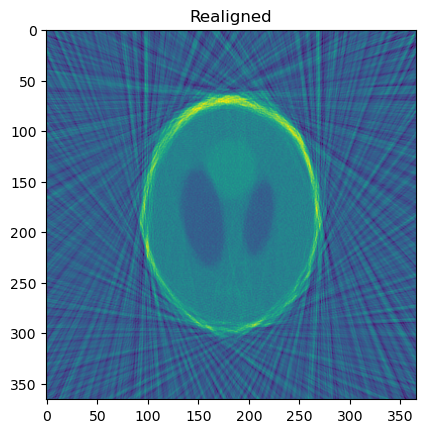

In [16]:
# Reconstruction for original
plt.imshow(recon[128])
plt.title('Original')
plt.show()

# Reconstruction for misaligned
plt.imshow(recon_mis[128])
plt.title('Misaligned')
plt.show()

# Reconstruction for realigned
plt.imshow(recon_align[128])
plt.title('Realigned')
plt.show()